In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load in the data
data = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/Asurion_data_v2.csv', parse_dates=['weeks_monday'])
print (data)

                     phone_model phone_size phone_color  claim weeks_monday
0                   alcatel axel       32gb       black      1   2022-01-24
1                   alcatel axel       32gb       black      3   2022-11-14
2                   alcatel axel       32gb       black      1   2022-11-21
3                   alcatel axel       32gb       black      3   2022-11-28
4                   alcatel axel       32gb       black      1   2022-12-12
...                          ...        ...         ...    ...          ...
26656  samsung galaxy z fold3 5g      256gb      silver     17   2023-01-30
26657  samsung galaxy z fold3 5g      256gb      silver     26   2023-02-06
26658  samsung galaxy z fold3 5g      256gb      silver      4   2023-02-13
26659  samsung galaxy z fold3 5g      512gb       black     61   2023-02-06
26660  samsung galaxy z fold3 5g      512gb       black     16   2023-02-13

[26661 rows x 5 columns]


In [3]:
#create a stacked bar graph to show the claims for all the months. 
#The x axis should be month, y axis is claim amount and the bars should be seperated by phone type
claims_month = data.groupby(pd.Grouper(key = 'weeks_monday', freq = 'M')).sum()
claims_month

,claim
weeks_monday,
2021-06-30,4786
2021-07-31,45620
2021-08-31,56070
2021-09-30,43586
2021-10-31,46919
2021-11-30,57205
2021-12-31,43455
2022-01-31,48081
2022-02-28,36720


In [4]:
data['month'] = data['weeks_monday'].dt.month

In [5]:
counts_by_model_month = data.groupby(['phone_model', 'month']).sum().reset_index(name='count')
counts_by_model_month

TypeError: reset_index() got an unexpected keyword argument 'name'

In [6]:
counts_by_model_month_pivot = counts_by_model_month.pivot(index='month', columns='phone_model', values='count')

counts_by_model_month_pivot.plot.bar(stacked=True)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Phone Claims by Model Overtime')
plt.xticks(rotation=0, ha='right')
plt.legend(loc=(1.05, 0.1), title = 'Phone Model')
plt.show()

NameError: name 'counts_by_model_month' is not defined

In [7]:
#create a new df of just apple and samsung models because they have the majority of claims
model_majority = data[data['phone_model'].str.contains("samsung|apple")]
model_majority

,phone_model,phone_size,phone_color,claim,weeks_monday,month
32,apple iphone 11,128gb,black,111,2021-06-28,6
33,apple iphone 11,128gb,black,319,2021-07-05,7
34,apple iphone 11,128gb,black,320,2021-07-12,7
35,apple iphone 11,128gb,black,305,2021-07-19,7
36,apple iphone 11,128gb,black,269,2021-07-26,7
...,...,...,...,...,...,...
26656,samsung galaxy z fold3 5g,256gb,silver,17,2023-01-30,1
26657,samsung galaxy z fold3 5g,256gb,silver,26,2023-02-06,2
26658,samsung galaxy z fold3 5g,256gb,silver,4,2023-02-13,2
26659,samsung galaxy z fold3 5g,512gb,black,61,2023-02-06,2


In [8]:
counts_by_majority_month = model_majority.groupby(['phone_model', 'month']).size().reset_index(name='count')
counts_by_majority_month

,phone_model,month,count
0,apple iphone 11,1,173
1,apple iphone 11,2,101
2,apple iphone 11,3,72
3,apple iphone 11,4,72
4,apple iphone 11,5,86
...,...,...,...
914,samsung galaxy z fold3 5g,8,5
915,samsung galaxy z fold3 5g,9,6
916,samsung galaxy z fold3 5g,10,14
917,samsung galaxy z fold3 5g,11,21


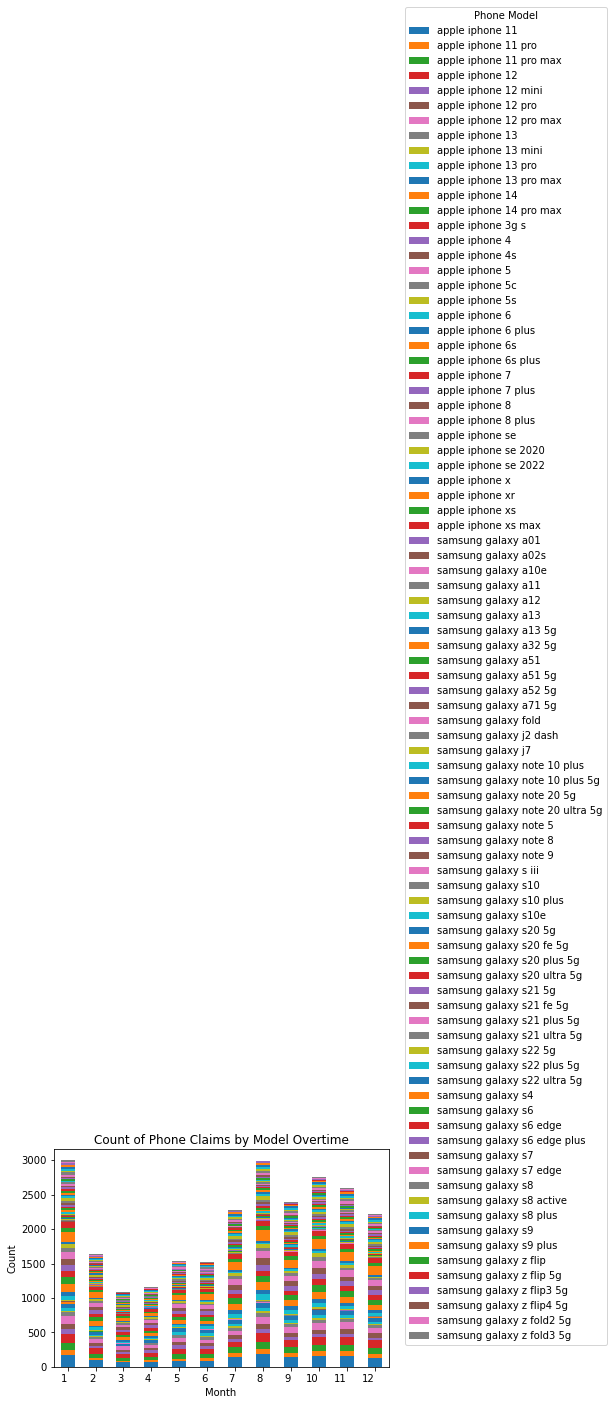

In [9]:
counts_by_majority_month_pivot = counts_by_majority_month.pivot(index='month', columns='phone_model', values='count')

counts_by_majority_month_pivot.plot.bar(stacked=True)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Phone Claims by Model Overtime')
plt.xticks(rotation=0, ha='right')
plt.legend(loc=(1.05, 0.1), title = 'Phone Model')
plt.show()

In [10]:
#want to look at color and storage claim distribution for just iphones
#new df of iphones
iphone = data[data['phone_model'].str.contains("iphone")]
iphone

,phone_model,phone_size,phone_color,claim,weeks_monday,month
32,apple iphone 11,128gb,black,111,2021-06-28,6
33,apple iphone 11,128gb,black,319,2021-07-05,7
34,apple iphone 11,128gb,black,320,2021-07-12,7
35,apple iphone 11,128gb,black,305,2021-07-19,7
36,apple iphone 11,128gb,black,269,2021-07-26,7
...,...,...,...,...,...,...
17906,apple iphone xs max,64gb,silver,18,2023-01-16,1
17907,apple iphone xs max,64gb,silver,19,2023-01-23,1
17908,apple iphone xs max,64gb,silver,14,2023-01-30,1
17909,apple iphone xs max,64gb,silver,13,2023-02-06,2


In [11]:
counts_by_color_month = iphone.groupby(['phone_color', 'month']).size().reset_index(name='count')
counts_by_color_month

,phone_color,month,count
0,black,1,190
1,black,2,105
2,black,3,71
3,black,4,76
4,black,5,96
...,...,...,...
173,yellow,8,52
174,yellow,9,42
175,yellow,10,44
176,yellow,11,45


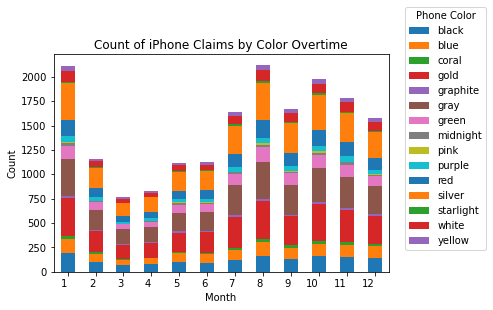

In [12]:
counts_by_color_month_pivot = counts_by_color_month.pivot(index='month', columns='phone_color', values='count')

counts_by_color_month_pivot.plot.bar(stacked=True)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of iPhone Claims by Color Overtime')
plt.xticks(rotation=0, ha='right')
plt.legend(loc=(1.05, 0.1), title = 'Phone Color')
plt.show()

In [13]:
#get counts of claims for each month (1-12) for iphones
counts_by_storage_month = iphone.groupby(['phone_size', 'month']).size().reset_index(name='count')
counts_by_storage_month

,phone_size,month,count
0,128gb,1,599
1,128gb,2,345
2,128gb,3,225
3,128gb,4,236
4,128gb,5,325
...,...,...,...
78,8gb,8,5
79,8gb,9,6
80,8gb,10,7
81,8gb,11,1


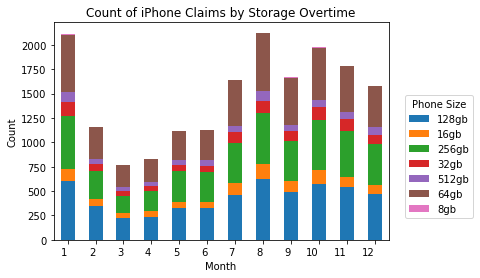

In [14]:
counts_by_storage_month_pivot = counts_by_storage_month.pivot(index='month', columns='phone_size', values='count')

counts_by_storage_month_pivot.plot.bar(stacked=True)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of iPhone Claims by Storage Overtime')
plt.xticks(rotation=0, ha='right')
plt.legend(loc=(1.05, 0.1), title = 'Phone Size')
plt.show()


In [15]:
#new dataset of just iphone14
iphone14 = data[data['phone_model'].str.contains("iphone 14")]
iphone14

,phone_model,phone_size,phone_color,claim,weeks_monday,month
7939,apple iphone 14,128gb,black,7,2022-11-14,11
7940,apple iphone 14,128gb,black,11,2022-11-21,11
7941,apple iphone 14,128gb,black,15,2022-11-28,11
7942,apple iphone 14,128gb,black,25,2022-12-05,12
7943,apple iphone 14,128gb,black,20,2022-12-12,12
...,...,...,...,...,...,...
8002,apple iphone 14 pro max,128gb,gold,50,2023-02-06,2
8003,apple iphone 14 pro max,128gb,gold,18,2023-02-13,2
8004,apple iphone 14 pro max,128gb,purple,68,2023-02-06,2
8005,apple iphone 14 pro max,128gb,purple,24,2023-02-13,2


In [16]:
counts_by_color_month14 = iphone14.groupby(['phone_color', 'month']).size().reset_index(name='count')
counts_by_color_month14

,phone_color,month,count
0,black,1,11
1,black,2,6
2,black,11,5
3,black,12,9
4,blue,1,3
5,blue,12,1
6,gold,2,2
7,purple,1,1
8,purple,2,2
9,red,1,1


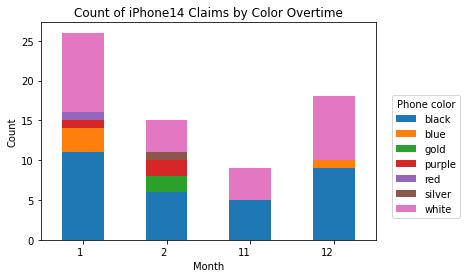

In [17]:
counts_by_color_month14pivot = counts_by_color_month14.pivot(index='month', columns='phone_color', values='count')

counts_by_color_month14pivot.plot.bar(stacked=True)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of iPhone14 Claims by Color Overtime')
plt.xticks(rotation=0, ha='right')
plt.legend(loc=(1.05, 0.1), title = 'Phone color')
plt.show()
#november and december 2022, jan and feb of 2023

In [18]:
counts_by_storage_month14 = iphone14.groupby(['phone_size', 'month']).sum().reset_index(name='count')
counts_by_storage_month14

TypeError: reset_index() got an unexpected keyword argument 'name'

In [19]:
counts_by_storage_month14pivot = counts_by_storage_month14.pivot(index='month', columns='phone_size', values='count')

counts_by_storage_month14pivot.plot.bar(stacked=True)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of iPhone14 Claims by Storage Overtime')
plt.xticks(rotation=0, ha='right')
plt.legend(loc=(1.05, 0.1), title = 'Phone size')
plt.show()

NameError: name 'counts_by_storage_month14' is not defined

In [20]:
#create a new variable that is 1 for apple product and 0 for non apple product to compare
def is_apple(model):
    if 'apple' in model.lower():
        return 1
    else:
        return 0
    
data['apple'] = data['phone_model'].apply(lambda x: is_apple(x))

In [21]:
#view dataset
data.sample(n=10, random_state=42)

,phone_model,phone_size,phone_color,claim,weeks_monday,month,apple
16688,apple iphone xr,64gb,yellow,11,2022-09-19,9,1
8868,apple iphone 6 plus,128gb,gold,2,2021-07-26,7,1
22791,samsung galaxy s20 fe 5g,128gb,lavender,5,2022-03-07,3,0
25656,samsung galaxy s8 plus,64gb,silver,7,2022-10-10,10,0
25711,samsung galaxy s9,64gb,black,25,2022-04-18,4,0
9779,apple iphone 6s,16gb,silver,1,2022-01-03,1,1
24979,samsung galaxy s8,64gb,black,30,2021-07-19,7,0
4084,apple iphone 12,64gb,red,160,2022-11-07,11,1
20226,samsung galaxy note 10 plus,256gb,blue,3,2021-10-11,10,0
10569,apple iphone 6s plus,16gb,gold,8,2022-08-22,8,1


In [22]:
#create a month variable (1-12) and a year variable
data['month'] = data['weeks_monday'].dt.month
data['year'] = data['weeks_monday'].dt.year

In [23]:
data.sample(n=10, random_state=42)

,phone_model,phone_size,phone_color,claim,weeks_monday,month,apple,year
16688,apple iphone xr,64gb,yellow,11,2022-09-19,9,1,2022
8868,apple iphone 6 plus,128gb,gold,2,2021-07-26,7,1,2021
22791,samsung galaxy s20 fe 5g,128gb,lavender,5,2022-03-07,3,0,2022
25656,samsung galaxy s8 plus,64gb,silver,7,2022-10-10,10,0,2022
25711,samsung galaxy s9,64gb,black,25,2022-04-18,4,0,2022
9779,apple iphone 6s,16gb,silver,1,2022-01-03,1,1,2022
24979,samsung galaxy s8,64gb,black,30,2021-07-19,7,0,2021
4084,apple iphone 12,64gb,red,160,2022-11-07,11,1,2022
20226,samsung galaxy note 10 plus,256gb,blue,3,2021-10-11,10,0,2021
10569,apple iphone 6s plus,16gb,gold,8,2022-08-22,8,1,2022


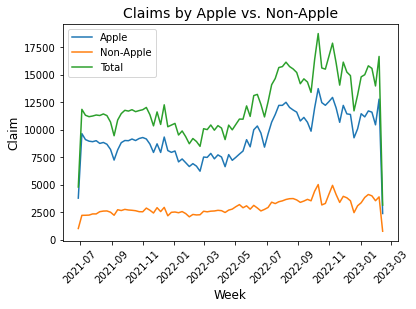

In [24]:
grouped_df = data.groupby(['apple', 'weeks_monday']).agg({'claim': 'sum'}).reset_index()

# create two separate DataFrames for apple=1 and apple=0
apple_1_df = grouped_df[grouped_df['apple'] == 1]
apple_0_df = grouped_df[grouped_df['apple'] == 0]
df_total = grouped_df.groupby('weeks_monday')['claim'].sum().reset_index()

# plot the two lines
plt.plot(apple_1_df['weeks_monday'], apple_1_df['claim'], label='Apple')
plt.plot(apple_0_df['weeks_monday'], apple_0_df['claim'], label='Non-Apple')
plt.plot(df_total['weeks_monday'], df_total['claim'], label='Total')

# set axis labels and title
plt.xlabel('Week', fontsize=12)
plt.ylabel('Claim', fontsize=12)
plt.title('Claims by Apple vs. Non-Apple', fontsize=14)

# show legend
plt.legend()
plt.xticks(rotation=45)

# show the plot
plt.show()

In [25]:
#bar graph
data['month_year'] = data['weeks_monday'].dt.to_period('M')
data['month_year'] = data['month_year'].dt.to_timestamp()

In [26]:
data = data.sort_values(by='month_year')

In [27]:
data.head(10)

,phone_model,phone_size,phone_color,claim,weeks_monday,month,apple,year,month_year
15805,apple iphone xr,128gb,white,15,2021-06-28,6,1,2021,2021-06-01
20976,samsung galaxy note 5,64gb,black,1,2021-06-28,6,0,2021,2021-06-01
13775,apple iphone 8 plus,256gb,silver,6,2021-06-28,6,1,2021,2021-06-01
9224,apple iphone 6 plus,64gb,gray,2,2021-06-28,6,1,2021,2021-06-01
14280,apple iphone se,16gb,gray,2,2021-06-28,6,1,2021,2021-06-01
19142,samsung galaxy a10e,32gb,black,33,2021-06-28,6,0,2021,2021-06-01
2801,apple iphone 11 pro max,64gb,gray,74,2021-06-28,6,1,2021,2021-06-01
11992,apple iphone 7 plus,128gb,red,4,2021-06-28,6,1,2021,2021-06-01
16959,apple iphone xs,64gb,gold,62,2021-06-28,6,1,2021,2021-06-01
21747,samsung galaxy s10 plus,128gb,black,14,2021-06-28,6,0,2021,2021-06-01


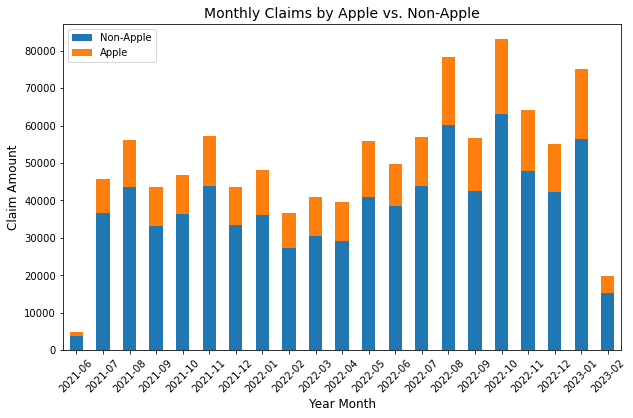

In [28]:
data['month_year'] = pd.to_datetime(data['month_year'])

grouped_data = data.groupby(['month_year', 'apple'])['claim'].sum().unstack()
grouped_data = grouped_data[[1, 0]]
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

#add legend
ax.legend(['Non-Apple', 'Apple'], loc='upper left')
x_labels = grouped_data.index.strftime('%Y-%m')
ax.set_xticklabels(x_labels, rotation=45)

#label axes
ax.set_xlabel('Year Month', fontsize=12)
ax.set_ylabel('Claim Amount', fontsize=12)
ax.set_title('Monthly Claims by Apple vs. Non-Apple', fontsize=14)

plt.show()

In [29]:
#since there is barely any data for the month of June 2021 and February 2023, we can drop them
data_no_jun2021_feb2023 = data.copy(deep = True)
data_no_jun2021_feb2023.sample(n=5, random_state=42)

,phone_model,phone_size,phone_color,claim,weeks_monday,month,apple,year,month_year
26229,samsung galaxy z flip3 5g,128gb,black,113,2022-08-08,8,0,2022,2022-08-01
18271,kyocera duraforce pro 2,64gb,black,1,2022-02-21,2,0,2022,2022-02-01
3794,apple iphone 12,64gb,black,201,2022-11-21,11,1,2022,2022-11-01
7036,apple iphone 13 pro,128gb,graphite,135,2023-01-02,1,1,2023,2023-01-01
10352,apple iphone 6s plus,128gb,gold,5,2023-01-02,1,1,2023,2023-01-01


In [30]:
mask_jun_2021 = ~((data_no_jun2021_feb2023['month'] == 6) & (data_no_jun2021_feb2023['year'] == 2021))
mask_feb_2023 = ~((data_no_jun2021_feb2023['month'] == 2) & (data_no_jun2021_feb2023['year'] == 2023))
data_no_left_tail = data_no_jun2021_feb2023[mask_jun_2021]
data_no_tails = data_no_left_tail[mask_feb_2023]

/tmp/ipykernel_218812/2201532667.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_no_tails = data_no_left_tail[mask_feb_2023]


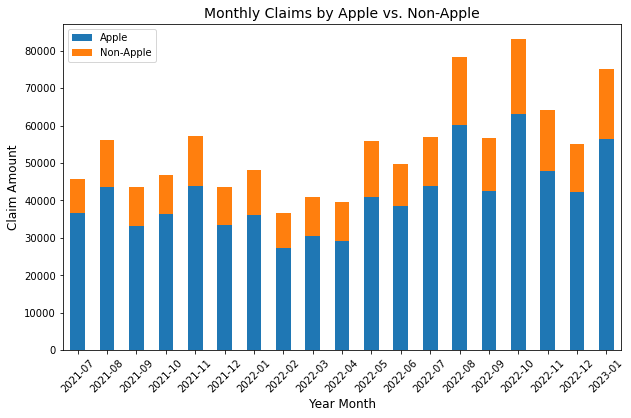

In [31]:
#barchart for apple vs. non apple phones
data_no_tails = data_no_tails.sort_values(by='month_year')

grouped_data = data_no_tails.groupby(['month_year', 'apple'])['claim'].sum().unstack()
grouped_data = grouped_data[[1, 0]] # so apple is at the bottom of each bar 

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.legend(['Apple', 'Non-Apple'], loc='upper left')
x_labels = grouped_data.index.strftime('%Y-%m')
ax.set_xticklabels(x_labels, rotation=45)

ax.set_xlabel('Year Month', fontsize=12)
ax.set_ylabel('Claim Amount', fontsize=12)
ax.set_title('Monthly Claims by Apple vs. Non-Apple', fontsize=14)

plt.show()

In [45]:
#use the method above to group basic colors vs. 'fun' colors 
#basic colors: black, white, gray, silver, gold
#fun colors: others

def is_color(model):
    if 'black' or 'silver' or 'gold' or 'graphite' in model.lower():
        return 1
    else:
        return 0
    
data['neutral_color'] = data['phone_color'].apply(lambda x: is_color(x))

data.sample(n=10, random_state=42)

,phone_model,phone_size,phone_color,claim,weeks_monday,month,apple,year,month_year,basic_color,neutral_color
12675,apple iphone 8,128gb,gray,1,2022-08-22,8,0,2022,2022-08-01,0,1
8649,apple iphone 6,32gb,gray,2,2022-02-07,2,0,2022,2022-02-01,0,1
26072,samsung galaxy s9 plus,64gb,blue,28,2022-11-14,11,0,2022,2022-11-01,0,1
2465,apple iphone 11 pro max,256gb,silver,14,2023-01-16,1,0,2023,2023-01-01,0,1
16456,apple iphone xr,64gb,coral,24,2023-01-09,1,0,2023,2023-01-01,0,1
25196,samsung galaxy s8,64gb,silver,4,2022-03-07,3,0,2022,2022-03-01,0,1
6357,apple iphone 13,128gb,green,22,2023-01-09,1,0,2023,2023-01-01,0,1
16812,apple iphone xs,256gb,gray,66,2021-10-25,10,0,2021,2021-10-01,0,1
10024,apple iphone 6s,32gb,silver,2,2022-10-03,10,0,2022,2022-10-01,0,1
20744,samsung galaxy note 20 ultra 5g,128gb,bronze,103,2022-03-07,3,0,2022,2022-03-01,0,1


In [46]:
data['month_year'] = data['weeks_monday'].dt.to_period('M')
data['month_year'] = data['month_year'].dt.to_timestamp()

data = data.sort_values(by='month_year')

data.head(10)

,phone_model,phone_size,phone_color,claim,weeks_monday,month,apple,year,month_year,basic_color,neutral_color
15805,apple iphone xr,128gb,white,15,2021-06-28,6,0,2021,2021-06-01,0,1
10359,apple iphone 6s plus,128gb,gray,7,2021-06-28,6,0,2021,2021-06-01,0,1
20976,samsung galaxy note 5,64gb,black,1,2021-06-28,6,0,2021,2021-06-01,0,1
13775,apple iphone 8 plus,256gb,silver,6,2021-06-28,6,0,2021,2021-06-01,0,1
9224,apple iphone 6 plus,64gb,gray,2,2021-06-28,6,0,2021,2021-06-01,0,1
14280,apple iphone se,16gb,gray,2,2021-06-28,6,0,2021,2021-06-01,0,1
19142,samsung galaxy a10e,32gb,black,33,2021-06-28,6,0,2021,2021-06-01,0,1
2801,apple iphone 11 pro max,64gb,gray,74,2021-06-28,6,0,2021,2021-06-01,0,1
11992,apple iphone 7 plus,128gb,red,4,2021-06-28,6,0,2021,2021-06-01,0,1
16959,apple iphone xs,64gb,gold,62,2021-06-28,6,0,2021,2021-06-01,0,1


In [53]:
grouped_df = data.groupby(['neutral_color', 'weeks_monday']).agg({'claim': 'sum'}).reset_index()


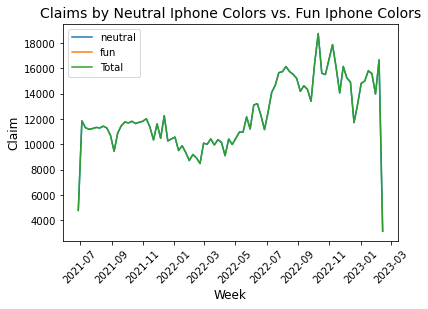

In [56]:
# create two separate DataFrames for neutral=1 and fun=0
color_1_df = grouped_df[grouped_df['neutral_color'] == 1]
color_0_df = grouped_df[grouped_df['neutral_color'] == 0]
df_total = grouped_df.groupby('weeks_monday')['claim'].sum().reset_index()

# plot the two lines
plt.plot(color_1_df['weeks_monday'], color_1_df['claim'], label='neutral')
plt.plot(color_0_df['weeks_monday'], color_0_df['claim'], label='fun')
plt.plot(df_total['weeks_monday'], df_total['claim'], label='Total')

# set axis labels and title
plt.xlabel('Week', fontsize=12)
plt.ylabel('Claim', fontsize=12)
plt.title('Claims by Neutral Iphone Colors vs. Fun Iphone Colors', fontsize=14)

# show legend
plt.legend()
plt.xticks(rotation=45)

# show the plot
plt.show()

In [57]:
data['month_year'] = pd.to_datetime(data['month_year'])

grouped_data = data.groupby(['month_year', 'neutral_color'])['claim'].sum().unstack()
grouped_data = grouped_data[[1, 0]]
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.legend(['Neutral Colors', 'Fun Colors'], loc='upper left')
x_labels = grouped_data.index.strftime('%Y-%m')
ax.set_xticklabels(x_labels, rotation=45)

ax.set_xlabel('Year Month', fontsize=12)
ax.set_ylabel('Claim Amount', fontsize=12)
ax.set_title('Monthly Claims by Neutral Iphone Colors vs. Fun Iphone Colors', fontsize=14)

plt.show()

KeyError: '[0] not in index'

In [58]:
data_no_tails_iPhone = data_no_tails[data_no_tails['phone_model'].str.contains('iphone')]
data_no_tails_iPhone

,phone_model,phone_size,phone_color,claim,weeks_monday,month,apple,year,month_year
13862,apple iphone 8 plus,64gb,gold,78,2021-07-26,7,1,2021,2021-07-01
8062,apple iphone 5,16gb,black,2,2021-07-05,7,1,2021,2021-07-01
8063,apple iphone 5,16gb,black,2,2021-07-12,7,1,2021,2021-07-01
8064,apple iphone 5,16gb,black,2,2021-07-19,7,1,2021,2021-07-01
8031,apple iphone 4s,16gb,black,1,2021-07-05,7,1,2021,2021-07-01
...,...,...,...,...,...,...,...,...,...
12690,apple iphone 8,128gb,gray,1,2023-01-16,1,1,2023,2023-01-01
12691,apple iphone 8,128gb,gray,2,2023-01-23,1,1,2023,2023-01-01
12692,apple iphone 8,128gb,gray,1,2023-01-30,1,1,2023,2023-01-01
16542,apple iphone xr,64gb,red,26,2023-01-23,1,1,2023,2023-01-01


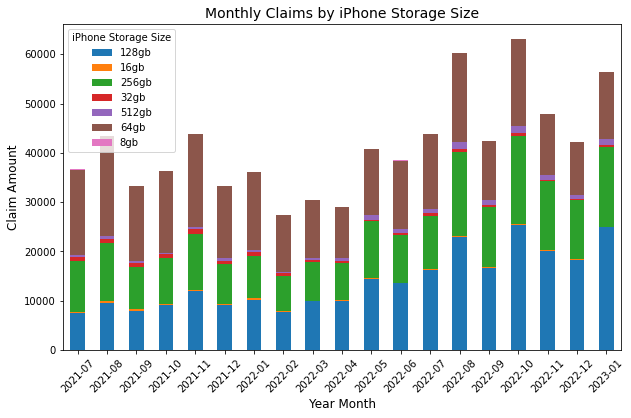

In [59]:
#barchart for iphone storage sizes
data_no_tails_iPhone = data_no_tails_iPhone.sort_values(by='month_year')

grouped_data = data_no_tails_iPhone.groupby(['month_year', 'phone_size'])['claim'].sum().unstack()

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.legend(loc= 'upper left', title = 'iPhone Storage Size')
x_labels = grouped_data.index.strftime('%Y-%m')
ax.set_xticklabels(x_labels, rotation=45)

ax.set_xlabel('Year Month', fontsize=12)
ax.set_ylabel('Claim Amount', fontsize=12)
ax.set_title('Monthly Claims by iPhone Storage Size', fontsize=14)

plt.show()